# Model Comparison — pyhvdfa

Compare H/V spectral ratios for three geologically distinct 1-D models to see
how layer structure controls the shape and peak frequency of the H/V curve.

In [ ]:
import matplotlib.pyplot as plt
from pyhvdfa import compute_hv, Layer, Model

## Three reference models

| Model | Description |
|---|---|
| **2-layer** | 20 m soft sediment (Vs = 200 m/s) over hard rock (Vs = 800 m/s) |
| **3-layer** | Shallow fill + intermediate layer + halfspace (classic basin) |
| **Kirk** | 4-layer gradient model — stiffness increasing with depth |

In [ ]:
models = {
    "2-layer (shallow soft)": Model.from_layers([
        Layer(thickness=20.0,  vp=500.0,  vs=200.0,  density=1800.0),
        Layer(thickness=0.0,   vp=1800.0, vs=800.0,  density=2200.0),
    ]),
    "3-layer (basin)": Model.from_layers([
        Layer(thickness=10.0,  vp=400.0,  vs=180.0,  density=1700.0),
        Layer(thickness=30.0,  vp=800.0,  vs=350.0,  density=1900.0),
        Layer(thickness=0.0,   vp=2000.0, vs=1000.0, density=2300.0),
    ]),
    "4-layer (Kirk)": Model.from_layers([
        Layer(thickness=5.0,   vp=200.0,  vs=100.0,  density=1700.0),
        Layer(thickness=10.0,  vp=600.0,  vs=300.0,  density=1900.0),
        Layer(thickness=15.0,  vp=1200.0, vs=600.0,  density=2100.0),
        Layer(thickness=0.0,   vp=2500.0, vs=1200.0, density=2400.0),
    ]),
}

# Compute H/V for each model
results = {
    name: compute_hv(m, freq_min=0.2, freq_max=20.0, n_freq=300)
    for name, m in models.items()
}

In [ ]:
# Peak frequencies
for name, r in results.items():
    i = r.hv.argmax()
    print(f"{name:30s}  f0 = {r.freq[i]:.2f} Hz  (H/V peak = {r.hv[i]:.2f})")

2-layer (shallow soft)          f0 = 2.42 Hz  (H/V peak = 11.81)
3-layer (basin)                 f0 = 2.08 Hz  (H/V peak = 13.44)
4-layer (Kirk)                  f0 = 3.40 Hz  (H/V peak = 25.93)


## Overlay plot

All three curves on a log-frequency axis. The peak shifts to lower frequency as
the soft layer thickens or as the impedance contrast increases.

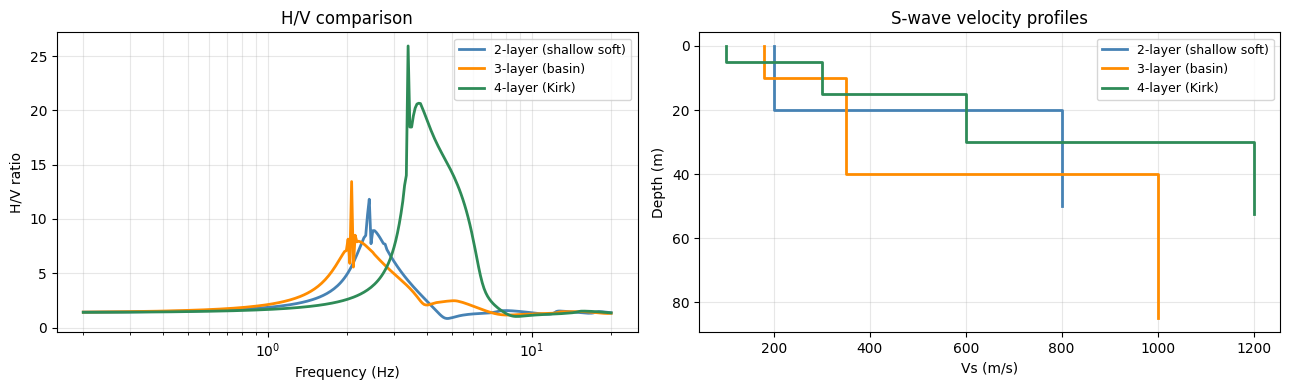

In [ ]:
colors = ["steelblue", "darkorange", "seagreen"]

fig, axes = plt.subplots(1, 2, figsize=(13, 4))

# Left: overlay
ax = axes[0]
for (name, r), c in zip(results.items(), colors):
    ax.semilogx(r.freq, r.hv, label=name, color=c, linewidth=2)
ax.set_xlabel("Frequency (Hz)")
ax.set_ylabel("H/V ratio")
ax.set_title("H/V comparison")
ax.legend(fontsize=9)
ax.grid(True, which="both", alpha=0.3)

# Right: velocity profiles (Vs vs depth)
ax2 = axes[1]
for (name, m), c in zip(models.items(), colors):
    depths = [0.0]
    for h in m.h:
        depths.append(depths[-1] + h)
    depths.append(depths[-1] + max(m.h) * 1.5)   # illustrative halfspace extent
    vs_steps = []
    for v in m.bta:
        vs_steps.extend([v, v])
    depth_steps = [depths[0]]
    for d in depths[1:]:
        depth_steps.extend([d, d])
    depth_steps = depth_steps[:len(vs_steps)]
    ax2.plot(vs_steps, depth_steps, label=name, color=c, linewidth=2)
ax2.invert_yaxis()
ax2.set_xlabel("Vs (m/s)")
ax2.set_ylabel("Depth (m)")
ax2.set_title("S-wave velocity profiles")
ax2.legend(fontsize=9)
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()